In [1]:
from pycocotools.coco import COCO # COCO python library
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import random
import string

import os

import json

from tqdm.notebook import tqdm

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
coco=COCO("../COCO_caption/annotations/instances_train2014.json")

loading annotations into memory...
Done (t=12.41s)
creating index...
index created!


In [3]:
cats = coco.loadCats(coco.getCatIds())
maincategories = list(set([cat['supercategory'] for cat in cats]))
subcategories = [cat['name'] for cat in cats]
print("Number of sub categories: ", len(subcategories))
print("List of sub categories: ", subcategories)

Number of sub categories:  80
List of sub categories:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
subcategories_imageIds = dict()
catIds = coco.getCatIds(catNms=subcategories)

for i in range(0,len(catIds)):
    imgIds = coco.getImgIds(catIds=catIds[i])
    img = []
    for j in imgIds: 
        img.append(j)
    subcategories_imageIds[subcategories[i]] = img

In [5]:
# choose the subcategories
train_cats = subcategories_imageIds['cat']
imgIdss = coco.getImgIds(imgIds = train_cats)
print("Total Images: ", len(imgIdss))

Total Images:  2818


In [6]:
next_pix = imgIdss
random.shuffle(next_pix)

In [7]:
coco_caps=COCO("../COCO_caption/annotations/captions_train2014.json")

loading annotations into memory...
Done (t=1.22s)
creating index...
index created!


In [ ]:

output_data = []


for img_id in next_pix:
    
    img_metadata = coco.loadImgs(img_id)[0]
    img_info = {
        'id': img_metadata['id'],
        'file_name': img_metadata['file_name'],
        'img_url': img_metadata['coco_url'],
        'reference_caption': []
    }
    
    
    ann_ids = coco_caps.getAnnIds(imgIds=img_metadata['id'])
    
    
    anns = coco_caps.loadAnns(ann_ids)
    for ann in anns:
        img_info['captions'].append(ann['caption']) 
    
    
    output_data.append(img_info)
    sample_output_data = output_data[:50]

In [9]:
with open('cat_data.json', 'w', encoding='utf-8') as f:
    json.dump(sample_output_data, f, ensure_ascii=False, indent=4)

A lady wearing a ring and two bracelets holds a gray cat.
An uncomfortable looking cat wearing a tight white fabric collar
Someone holding a grey cat that has been shaved. 
A dark gray cat with shaved fur is held by a woman.
a cat with a collar sitting by a woman


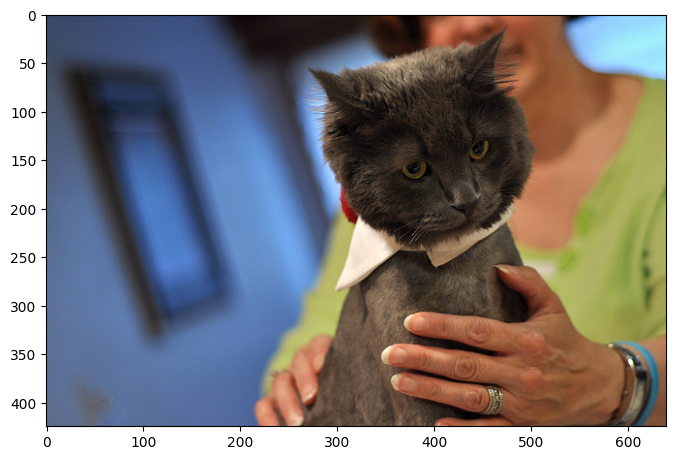

In [10]:
img = coco.loadImgs(next_pix[0])[0]
I = io.imread(img['coco_url'])
plt.imshow(I)
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.show()